In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

np.random.seed(0)

In [12]:
os.getcwd()

'C:\\Users\\chris\\Desktop\\210\\W210-Capstone\\models'

In [13]:
train = pd.read_csv('C:\\Users\\chris\\Desktop\\210\\W210-Capstone\\data\\training.csv')

In [15]:
unemp = train[train['INDICATOR'] == "Unemployment"]
rgdp = train[train['INDICATOR'] == "RealGDP"]
cpce = train[train['INDICATOR'] == "Core PCE"]
ccpi = train[train['INDICATOR'] == "Core CPI"]
ngnp = train[train['INDICATOR'] == "NominalGNP"]
rgnp = train[train['INDICATOR'] == "RealGNP"]

In [153]:
def model_setup(df):
    
    rand = df.sample(frac = 1)
    #80/20 split
    nrow = len(rand)
    
    train_prop = int(np.round(nrow*0.8))
    train = rand[:train_prop]
    val = rand[train_prop:]
    
    train = train[["FORECASTER ID", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF", "actual"]]
    val = val[["FORECASTER ID", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF", "actual"]]
    
    return train.dropna(), val.dropna()

In [106]:
def run_rf_model(df, variable_name, plot=True):
    train, val = model_setup(df)
    
    X, Y = train[["FORECASTER ID", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF"]], train["actual"].tolist()
    val_X, val_Y = val[["FORECASTER ID", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF"]], val["actual"].tolist()
    
    rf = RandomForestRegressor()
    fitted = rf.fit(X, Y)
    
    preds = []
    
    for i in range(len(val_Y)):
        
        row = val_X.iloc[[i]].values.tolist()
        pred = rf.predict(row)
        pred = pred.flatten()[0]
        
        preds.append(pred)
        
    diffs = np.subtract(val_Y, preds)

    r21 = np.corrcoef(val_Y, preds)[0][1]
    r22 = np.corrcoef(val_Y, np.array(val_X['pred_average'].tolist()))[0][1]
    
    mse1 = mean_squared_error(val_Y, preds)
    mse2 = mean_squared_error(val_Y, np.array(val_X['pred_average'].tolist()))
    
    if plot == True:
        print("Differences in actual vs. model prediction (" + variable_name + ")")
        print("Mean: " + str(np.mean(diffs)))
        print("Median: " + str(np.median(diffs)))
        print("Max: " + str(max(diffs)))
        print("Min: " + str(min(diffs)))
        print("Correlation Coef: " + str(r21))
        print("MSE: " + str(mse1))

        plt.hist(diffs)
        plt.title("Actual minus Model Prediction (" + variable_name + ")")
        plt.show()

        actual_diffs = np.subtract(val_Y, np.array(val_X['pred_average'].tolist()))
        print("Differences in actual vs. forecaster average prediction (" + variable_name + ")")
        print("Mean: " + str(np.mean(actual_diffs)))
        print("Median: " + str(np.median(actual_diffs)))
        print("Max: " + str(max(actual_diffs)))
        print("Min: " + str(min(actual_diffs)))
        print("Correlation Coef: " + str(r22))
        print("MSE: " + str(mse2))

        plt.hist(actual_diffs)
        plt.title("Actual Rate minus Forecaster Average Prediction (" + variable_name + ")")
        plt.show()
        
    else:
        return mse1, mse2, r21, r22

Differences in actual vs. model prediction (Unemployment)
Mean: 0.01681710042746921
Median: 9.769962616701378e-15
Max: 7.9463491594413505
Min: -7.113308600000002
Correlation Coef: 0.9645763765059887
MSE: 0.6137454354254072


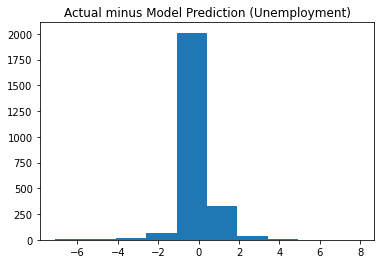

Differences in actual vs. forecaster average prediction (Unemployment)
Mean: 0.031466259166011326
Median: -0.0707240379107249
Max: 8.55461
Min: -4.73796
Correlation Coef: 0.9052688217801316
MSE: 1.5969463244539293


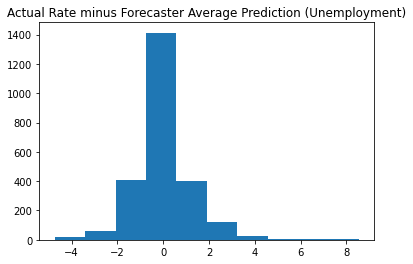

In [107]:
run_rf_model(unemp, "Unemployment")

Differences in actual vs. model prediction (Real GDP)
Mean: -0.04113694759830228
Median: -6.217248937900877e-15
Max: 4.0514436
Min: -6.2258163
Correlation Coef: 0.7649513180110946
MSE: 0.8581195730236516


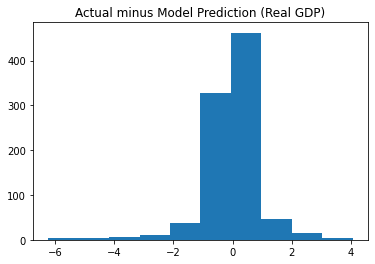

Differences in actual vs. forecaster average prediction (Real GDP)
Mean: -0.12459989909073121
Median: -0.05791999999999997
Max: 3.35324
Min: -5.73676
Correlation Coef: 0.543218574954041
MSE: 1.5144616936694295


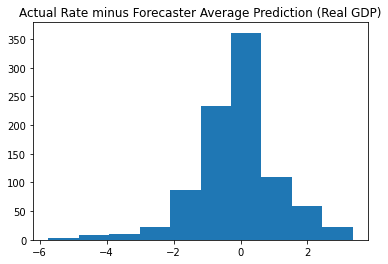

In [108]:
run_rf_model(rgdp, "Real GDP")

Differences in actual vs. model prediction (Core PCE)
Mean: 0.018027894333946037
Median: 0.010472282935892085
Max: 1.108058708004838
Min: -0.8117856257949816
Correlation Coef: 0.7315312256569761
MSE: 0.05372132660260585


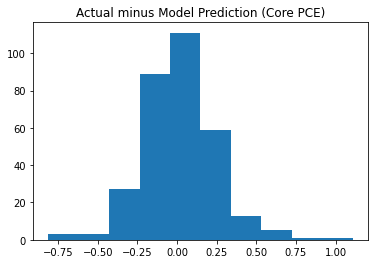

Differences in actual vs. forecaster average prediction (Core PCE)
Mean: -0.16334945464909603
Median: -0.11381168613870496
Max: 1.23175704965729
Min: -1.7922625750259298
Correlation Coef: 0.30255796763297127
MSE: 0.2524021522995324


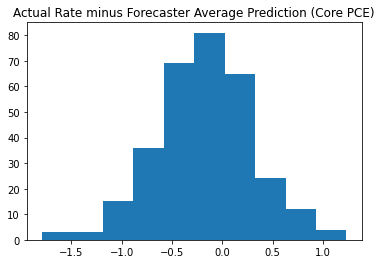

In [109]:
run_rf_model(cpce, "Core PCE")

Differences in actual vs. model prediction (Core CPI)
Mean: -0.022077930127484113
Median: -0.012554579452420667
Max: 1.0250303702551413
Min: -1.4000334370906593
Correlation Coef: 0.8379745304570285
MSE: 0.060371987919421666


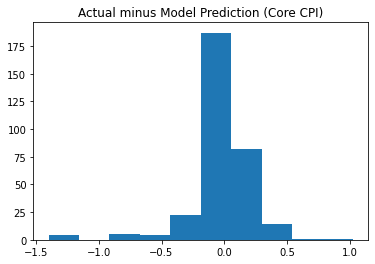

Differences in actual vs. forecaster average prediction (Core CPI)
Mean: -0.11678366802986787
Median: -0.09121432482497482
Max: 2.05930900500324
Min: -1.9544274735366662
Correlation Coef: 0.2838084786571413
MSE: 0.3361077166799977


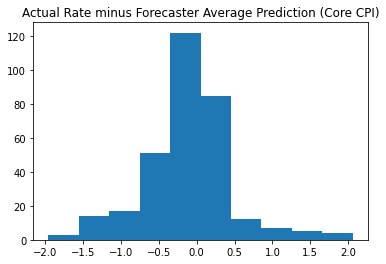

In [110]:
run_rf_model(ccpi, "Core CPI")

Differences in actual vs. model prediction (Nominal GNP)
Mean: -0.05528979993855413
Median: 0.0
Max: 3.233889900000001
Min: -4.978904100000009
Correlation Coef: 0.845104037078269
MSE: 1.1442844160373242


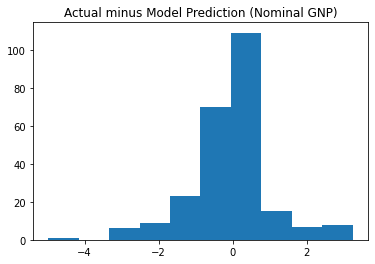

Differences in actual vs. forecaster average prediction (Nominal GNP)
Mean: 1.3734892458479717
Median: 1.0753449999999996
Max: 8.93743
Min: -3.662849999999999
Correlation Coef: 0.6501290181182172
MSE: 5.644543889792957


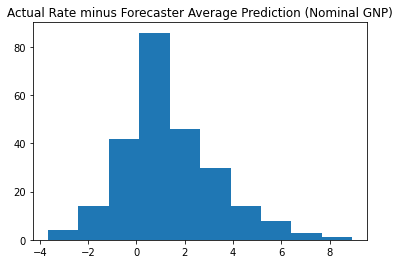

In [111]:
run_rf_model(ngnp, "Nominal GNP")

Differences in actual vs. model prediction (Real GNP)
Mean: -0.021045181594381485
Median: 0.03261690000000872
Max: 5.7655553500000005
Min: -5.890410200000008
Correlation Coef: 0.8787493804809859
MSE: 1.424323848042462


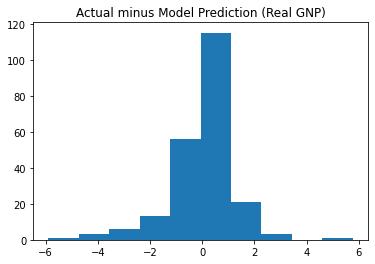

Differences in actual vs. forecaster average prediction (Real GNP)
Mean: 0.6932361902283182
Median: 0.66804
Max: 6.23229
Min: -3.73796
Correlation Coef: 0.7888534249771993
MSE: 2.852270859660216


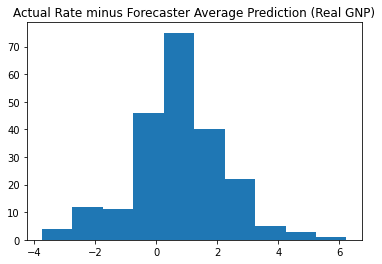

In [112]:
run_rf_model(rgnp, "Real GNP")

In [124]:
def evaluate():
    mse1s = []
    mse2s = []
    r21s = []
    r22s = []
    for i in [unemp, rgdp, cpce, ccpi, ngnp, rgnp]:
        mse1, mse2, r21, r22 = run_rf_model(i, "name", plot=False)
        mse1s.append(np.sqrt(mse1))
        mse2s.append(np.sqrt(mse2))
        r21s.append(r21)
        r22s.append(r22)
        
    mse_diff = np.mean(np.subtract(mse2s,mse1s))
    r2_diff = np.mean(np.subtract(r21s, r22s))
    
    print("We decrease MSE by " + str(mse_diff))
    print("We increase R-squared by " + str(r2_diff))

In [125]:
evaluate()

We decrease MSE by 0.5315997241765705
We increase R-squared by 0.2509026181473332
